# Анализ  Google Play market

### Оглавление

1. [Загрузка данных](#loading)
2. [Подготовка данных](#prep)
  1. [Выбросы](#nan)
  2. [Очистка данных](#clearing)
3. [EDA](#eda)
    1. [Визуализация](#visual)
    2.[Проверка статистических гипотез](#hypothesis)
    3. [ANOVA](#anova)
    4. [Корреляция](#corr)
    5. [Линейная регрессия](#regg)


## Загрузка данных
<a id=loading></a>

In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [194]:
df = pd.read_csv('googleplaystore.csv')

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Подготовка данных
<a id=prep></a>

In [195]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [196]:
#заменим пробелы в названиях колонок на _ для удобства
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last_Updated    10841 non-null  object 
 11  Current_Ver     10833 non-null  object 
 12  Android_Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Выбросы
<a id=nan></a>

In [198]:
df.describe() 
#Проверим столбец Rating на наличие выбросов

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


<AxesSubplot:title={'center':'Распределение оценок'}>

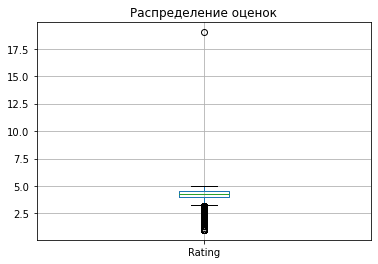

In [199]:
#Построим boxplot для удобства
df['Rating'].plot(kind='box',
                   title='Распределение оценок', grid=True)

In [200]:
#На boxplot видно 1 значение,которое очень сильно отличается от остальных. Найдем эту строку в df
df[df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [201]:
"""
Данные в этой строке отличаются от всего df. Можно заметить,что записи введены некорректно и сдвинуты на 1 ячейку 
назад. Пока удалим строку.
"""

df.drop([10472], inplace=True)

<AxesSubplot:title={'center':'Распределение оценок'}>

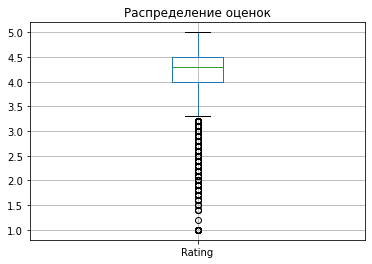

In [202]:
#после удаления некорректной строки
df['Rating'].plot(kind='box',
                   title='Распределение оценок', grid=True)

### Очистка данных 
<a id=clearing></a>

In [203]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [204]:
#Изменим значения столбца Reviews на числовые
df['Reviews'] = df['Reviews'].astype('int')

In [205]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [206]:
#Изменим значения столбца Size на числовые, заменим 'Varies with device' на NaN, переведем все значения в Мб
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

df['Size'] = df['Size'].apply(lambda x: (str(x).replace('M','')) if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: (str(x).replace(',','')) if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k',''))/1000 if 'k' in str(x) else x)


df['Size'] = df['Size'].astype(float)

In [207]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [208]:
#очистим столбец Installs от + и , переведем значения в числовой формат
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].astype(int)

In [209]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [210]:
#очистим столбец Price от знака $ и переведм в числовой формат
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].astype(float)

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content_Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last_Updated    10840 non-null  object 
 11  Current_Ver     10832 non-null  object 
 12  Android_Ver     10838 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1.1+ MB


In [212]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10840.000000
mean,4.191757,4.441529e+05,21.516530,1.546434e+07,1.027368
std,0.515219,2.927761e+06,22.588748,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,4.900000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,30.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [213]:
#Переведем столбец Last_Updated в формат datetime
from datetime import datetime
df['Last_Updated']= pd.to_datetime(df.Last_Updated)

In [214]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


## EDA
<a id=eda></a>

### Визуализация
<a id=visual></a>

In [24]:
most_pop_category = df[['Category','Installs']].groupby('Category').sum().sort_values(by='Installs', ascending=False)
most_pop_category

,Installs
Category,
GAME,3.508602e+10
COMMUNICATION,3.264728e+10
PRODUCTIVITY,1.417609e+10
SOCIAL,1.406987e+10
TOOLS,1.145277e+10
FAMILY,1.025826e+10
PHOTOGRAPHY,1.008825e+10
NEWS_AND_MAGAZINES,7.496318e+09
TRAVEL_AND_LOCAL,6.868887e+09


#### Самая популярная категория по количеству загрузок - Игры

<AxesSubplot:title={'center':'Топ-10 категорий по количеству загрузок'}, xlabel='Категория', ylabel='Количество загрузок'>

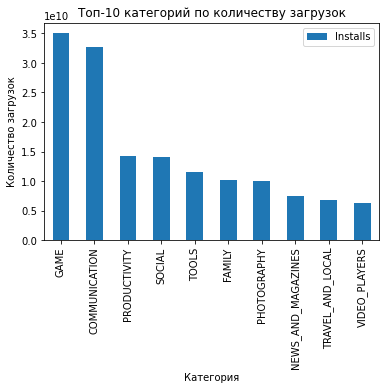

In [25]:
most_pop_category.head(10).plot(kind='bar',                                                                 
                       title='Топ-10 категорий по количеству загрузок',
                       xlabel='Категория',
                       ylabel='Количество загрузок')

In [26]:
type_ = df['Type'].value_counts()
type_

Free    10039
Paid      800
Name: Type, dtype: int64

#### Количество платных и бесплатных приложений

<AxesSubplot:ylabel='Type'>

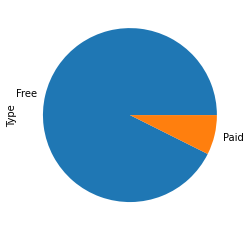

In [27]:
type_.plot(kind='pie')

#### Топ-20 самых дорогих приложений

In [28]:
"""Здесь встречаются дубликаты названий,что с ними делать?"""
top_price = df[['App','Price']].sort_values(by='Price', ascending=False).head(20)
top_price

,App,Price
4367,I'm Rich - Trump Edition,400.00
5351,I am rich,399.99
5358,I am Rich!,399.99
4197,most expensive app (H),399.99
5369,I am Rich,399.99
5359,I am rich(premium),399.99
5373,I AM RICH PRO PLUS,399.99
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,399.99
5356,I Am Rich Premium,399.99
4362,💎 I'm rich,399.99


#### Достпуность приложений по возрастным группам

In [29]:
content = df[['Category','Content_Rating']].groupby('Content_Rating').count().sort_values(by='Category')
content

,Category
Content_Rating,
Unrated,2
Adults only 18+,3
Everyone 10+,414
Mature 17+,499
Teen,1208
Everyone,8714


<AxesSubplot:xlabel='Content_Rating'>

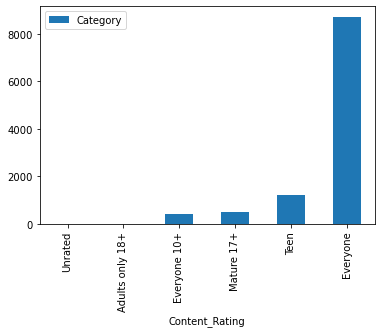

In [30]:
content.plot(kind='bar')

#### Количество отзывов для каждой категории приложений

In [31]:
rew = df[['Category','Reviews']].groupby('Category').sum().sort_values(by='Reviews', ascending=False)
rew.head(10)

,Reviews
Category,
GAME,1585422349
COMMUNICATION,815462260
SOCIAL,621241422
FAMILY,410226330
TOOLS,273185044
PHOTOGRAPHY,213516650
SHOPPING,115041222
PRODUCTIVITY,114116975
VIDEO_PLAYERS,110380188


<AxesSubplot:xlabel='Category'>

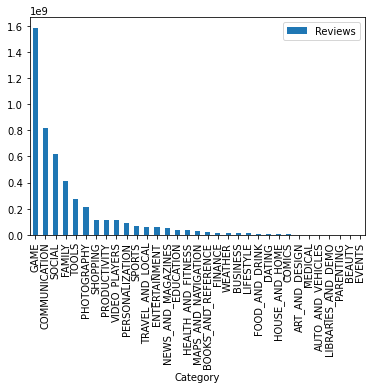

In [87]:
rew.plot(kind='bar')

#### Сравнение рейтинга для топ-10 категорий приложений

In [69]:
top_category = df['Category'].value_counts().sort_values(ascending=False).head(10).index.values
top_category

array(['FAMILY', 'GAME', 'TOOLS', 'MEDICAL', 'BUSINESS', 'PRODUCTIVITY',
       'PERSONALIZATION', 'COMMUNICATION', 'SPORTS', 'LIFESTYLE'],
      dtype=object)

<AxesSubplot:xlabel='Category', ylabel='Rating'>

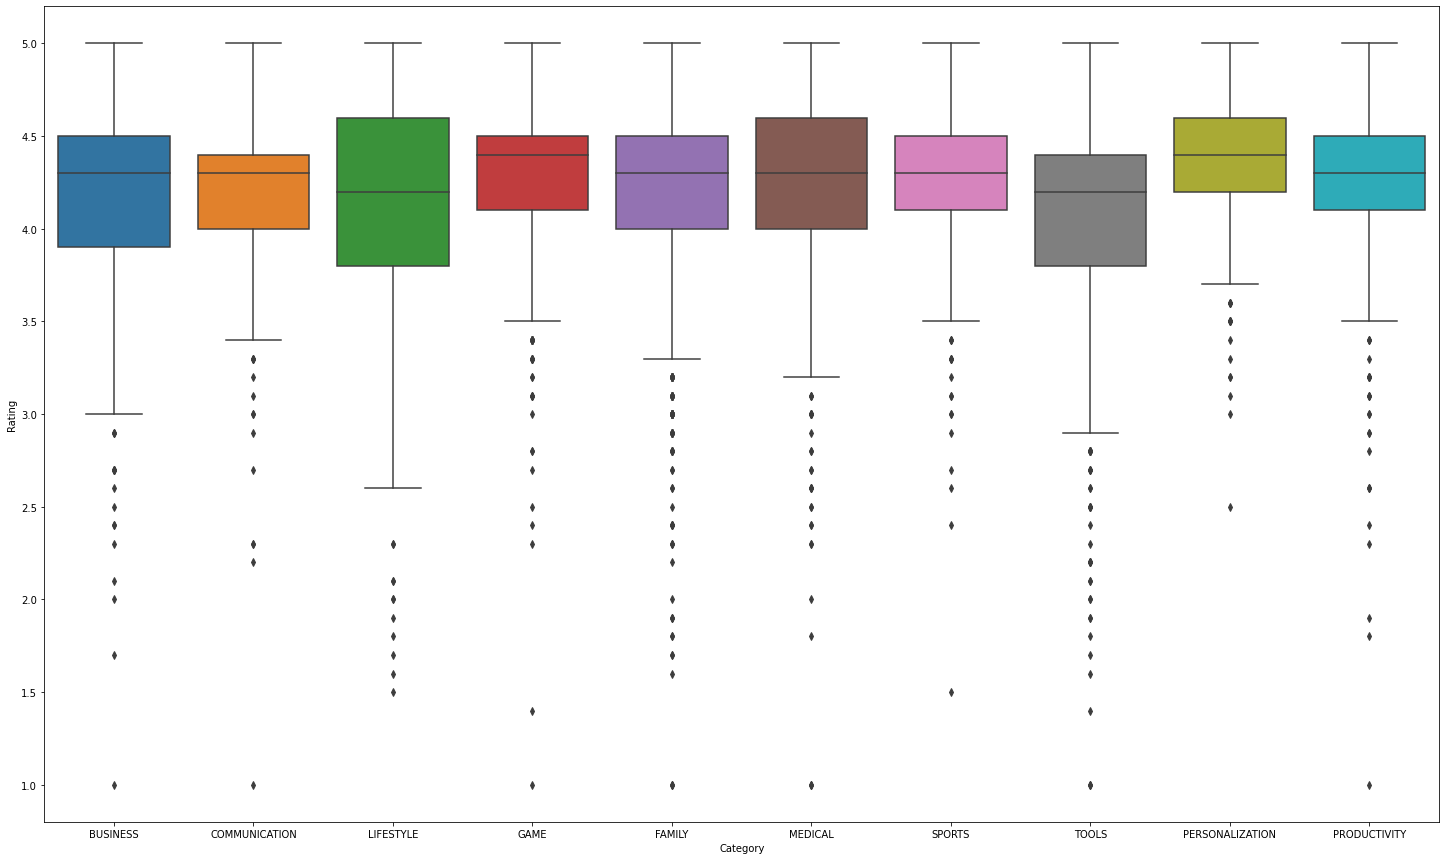

In [78]:
plt.figure(figsize=(25,15))

sns.boxplot(x='Category', y='Rating',
           data=df[df['Category'].isin(top_category)])

### Проверка статистических гипотез 
<a id=hypothesis></a>

In [88]:
#отфильтруем датафрейм по нужным колонкам
df_filtr=df[['Category','Rating','Type']]
df_filtr

,Category,Rating,Type
0,ART_AND_DESIGN,4.1,Free
1,ART_AND_DESIGN,3.9,Free
2,ART_AND_DESIGN,4.7,Free
3,ART_AND_DESIGN,4.5,Free
4,ART_AND_DESIGN,4.3,Free
...,...,...,...
10836,FAMILY,4.5,Free
10837,FAMILY,5.0,Free
10838,MEDICAL,NaN,Free
10839,BOOKS_AND_REFERENCE,4.5,Free


#### Средний рейтинг по категориям для бесплатных приложений

In [36]:
free=df_filtr.loc[df_filtr['Type']=='Free'].groupby('Category').mean()
free

,Rating
Category,
ART_AND_DESIGN,4.338983
AUTO_AND_VEHICLES,4.184722
BEAUTY,4.278571
BOOKS_AND_REFERENCE,4.349412
BUSINESS,4.118493
COMICS,4.155172
COMMUNICATION,4.165359
DATING,3.978010
EDUCATION,4.379470


#### Средний рейтинг по категориям для платных приложений

In [37]:
paid=df_filtr.loc[df_filtr['Type']=='Paid'].groupby('Category').mean()
paid

,Rating
Category,
ART_AND_DESIGN,4.733333
AUTO_AND_VEHICLES,4.600000
BOOKS_AND_REFERENCE,4.275000
BUSINESS,4.200000
COMMUNICATION,4.063636
DATING,3.625000
EDUCATION,4.750000
ENTERTAINMENT,4.600000
EVENTS,NaN


In [38]:
paid['Rating'].fillna(paid['Rating'].mean(), inplace=True)

In [39]:
paid

,Rating
Category,
ART_AND_DESIGN,4.733333
AUTO_AND_VEHICLES,4.600000
BOOKS_AND_REFERENCE,4.275000
BUSINESS,4.200000
COMMUNICATION,4.063636
DATING,3.625000
EDUCATION,4.750000
ENTERTAINMENT,4.600000
EVENTS,4.231925


#### Пользователям одинаково нравятся и платные и бесплатные приложения?
Средняя удовлетворенность пользователей платными и бесплатными приложениями равна? (двухсторонний тест)

H0: средний рейтинг платных и бесплатных приложений одинаковый

H1: средний рейтинг платных и бесплатных приложений отличается


In [41]:
alpha = 0.05
result = st.ttest_ind(free['Rating'], paid['Rating'], equal_var=False)
print(result)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, пользователи по разному относятся к платным и бесплатным приложениям')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=-0.509854084448592, pvalue=0.6134180562498498)
Не отвергаем нулевую гипотезу


Т.к. t-test < 0, то платные приложения в среднем нравятся больше, чем бесплатные. Т.к. p-value > 0.05, то эта разница статистически не значима

#### Пользователям не нравятся бесплатные приложения?
Средний рейтинг бесплатных приложений меньше 4.25? (односторонний тест)

H0: средний рейтинг бесплатных приложений >= 4.25

H1: средний рейтинг бесплатных приложений < 4.25

In [42]:
alpha = 0.05
result = st.ttest_1samp(free['Rating'], 4.25)

print(free['Rating'].mean())
print(result)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, среднее меньше 4.25')
else:
    print('Не отвергаем нулевую гипотезу')

4.199879351915274
Ttest_1sampResult(statistic=-2.749584490320655, pvalue=0.009731012308830873)
Отвергаем нулевую гипотезу, среднее меньше 4.25


#### Пользователям нравятся платные приложения?
Средний рейтинг платных приложений больше 4.1? (односторонний тест)

H0: средний рейтинг платных приложений <= 4.1

H1: средний рейтинг платных приложений > 4.1

In [43]:
alpha = 0.05
result = st.ttest_1samp(paid['Rating'], 4.1)

print(paid['Rating'].mean())
print(result)

if result.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу, среднее больше 4.1 (приложения нравятся)')
else:
    print('Не отвергаем нулевую нулевую гипотезу, платные приложения не нравятся пользователям')

4.231924708757508
Ttest_1sampResult(statistic=2.1932386003551776, pvalue=0.036458393136138106)
Отвергаем нулевую гипотезу, среднее больше 4.1 (приложения нравятся)


<AxesSubplot:title={'center':'Распределение среднего рейтинга платных приложений'}, ylabel='Frequency'>

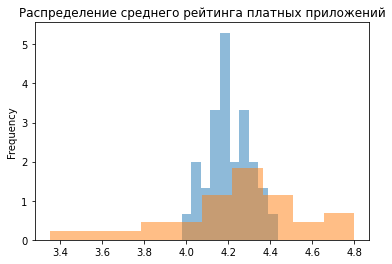

In [44]:
# сравнение рейтинга платных и бесплатных приложений
free['Rating'].plot(kind='hist', 
                     title='Распределение среднего рейтинга бесплатных приложений',
                     alpha = 0.5,
                     density = True)


paid['Rating'].plot(kind='hist', 
                     title='Распределение среднего рейтинга платных приложений',
                     alpha = 0.5,
                     density = True)

#### Вывод: бесплатным приложеням пользователи  в среднем ставят рейтинг 4.0-4.4, а платные приложения пользователи оценивают более критично и рейтинг варьируется в пределах 3.8-4.8.

In [57]:
#фильтр по нужным колонкам
filt = df[['Category', 'Rating', 'Content_Rating']]
filt

,Category,Rating,Content_Rating
0,ART_AND_DESIGN,4.1,Everyone
1,ART_AND_DESIGN,3.9,Everyone
2,ART_AND_DESIGN,4.7,Everyone
3,ART_AND_DESIGN,4.5,Teen
4,ART_AND_DESIGN,4.3,Everyone
...,...,...,...
10836,FAMILY,4.5,Everyone
10837,FAMILY,5.0,Everyone
10838,MEDICAL,NaN,Everyone
10839,BOOKS_AND_REFERENCE,4.5,Mature 17+


In [53]:
filt = df['Content_Rating'].value_counts()

filt

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content_Rating, dtype: int64

#### Средний рейтинг для приложений, которые доступны для всех

In [58]:
everyone = filt[(filt['Content_Rating']=='Everyone')].groupby('Category').mean()
                
everyone

,Rating
Category,
ART_AND_DESIGN,4.346552
AUTO_AND_VEHICLES,4.188732
BEAUTY,4.287179
BOOKS_AND_REFERENCE,4.351333
BUSINESS,4.119064
COMICS,4.344000
COMMUNICATION,4.140678
DATING,4.100000
EDUCATION,4.385315


#### Средний рейтинг для приложений, которые имеют возрастные ограничения

In [59]:
age_group = filt[(filt['Content_Rating']=='Teen') | (filt['Content_Rating']=='Mature 17+')| (filt['Content_Rating']==
'Everyone 10+') | (filt['Content_Rating']=='Adults only 18+') | (filt['Content_Rating']=='Unrated')].groupby('Category').mean()

age_group

,Rating
Category,
ART_AND_DESIGN,4.525000
AUTO_AND_VEHICLES,4.250000
BEAUTY,4.166667
BOOKS_AND_REFERENCE,4.317857
BUSINESS,4.300000
COMICS,4.012121
COMMUNICATION,4.318182
DATING,3.963784
EDUCATION,4.433333


#### Приложения, ориентированные для всех, пользователям нравятся больше?
Средний рейтинг таких приложений больше, чем 4.2? (односторонний тест)

H0: средний рейтинг приложений, ориентированных для всех <= 4.2

H1: средний рейтинг приложений, ориентированных для всех > 4.2

In [60]:
alpha = 0.05
result = st.ttest_1samp(everyone['Rating'], 4.2)

print(everyone['Rating'].mean())
print(result)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, средний рейтинг  меньше 4.2')
else:
    print('Не отвергаем нулевую гипотезу')

4.208915202508137
Ttest_1sampResult(statistic=0.5104078792542645, pvalue=0.6132688008068086)
Не отвергаем нулевую гипотезу


#### Приложения, которые имеют возрастную категорию, имеют высокий рейтинг?
Средний рейтинг таких приложений больше, чем 4.5? (односторонний тест)

Н0: средний рейтинг приложений, имеющих возрастную группу <= 4.5

Н1: средний рейтинг приложений, имеющих возрастную группу > 4.5

In [61]:
alpha = 0.05
result = st.ttest_1samp(age_group['Rating'], 4.5)

print(age_group['Rating'].mean())
print(result)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, средний рейтинг меньше 4.5')
else:
    print('Не отвергаем нулевую гипотезу')

4.274852533242304
Ttest_1sampResult(statistic=-6.668588437237322, pvalue=1.859724540795583e-07)
Отвергаем нулевую гипотезу, средний рейтинг меньше 4.5


#### Приложения, имеющие возрастную группу, и приложения, доступные для всех, нравятся пользователям одинаково?
Средняя удовлетворенность пользователей доступными для всех приложениям и приложенями, имеющие возрастные ограничения, равна? (двухсторонний тест)

H0: средний рейтинг доступных для всех приложений и приложений, имеющие возрастные ограничения, одинаков

H1: средний рейтинг доступных для всех приложений и приложений, имеющие возрастные ограничения, отличается

In [62]:
alpha = 0.05
result = st.ttest_ind(everyone['Rating'], age_group['Rating'], equal_var=False)
print(result)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, пользователи по разному относятся к доступным для всех приложениям и приложениям с возарстынми ограничениям')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=-1.734599236082827, pvalue=0.08942522215082713)
Не отвергаем нулевую гипотезу



Т.к. t-test < 0, то приложения?имеющие возрастные ограничения, в среднем нравятся больше, чем приложения доступные для всех. 
Т.к. p-value > 0.05, то эта разница статистически не значима.

### ANOVA, сравнение средних оценок между всеми категориями
<a id=anova></a>

In [312]:
from scipy.stats import f_oneway

H0: Статистическое среднее значение всех категорий  одинаково

H1: Статистическое среднее значение всех категорий не одинаково

In [321]:
# замена NaN в столбцах на среднее значение
df['Rating'].fillna(df['Rating'].mean(), inplace = True)
df['Size'].fillna(df['Size'].mean(), inplace = True)

In [322]:
anova1 = df[['Rating']]
anova2 = df[['Size']]
anova3 = df[['Reviews']]
anova4 = df[['Installs']]
anova5 = df[['Price']]

In [338]:
alpha = 0.05

result = f_oneway(anova1, anova2, anova3, anova4, anova5)
print(result)

if p < alpha:
    print('Разное среднее значение (отвергаем нулевую гипотезу)')
else:
    print('Одинаковое среднее значение (не отвергаем нулевую гипотезу)')

F_onewayResult(statistic=array([353.28124173]), pvalue=array([8.21888796e-301]))
Разное среднее значение (отвергаем нулевую гипотезу)


### Корреляция
<a id=corr></a>

In [89]:
display(df.corr(method = 'kendall'))
display(df.corr(method = 'spearman'))
display(df.corr())

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.121801,0.047689,0.060525,0.053563
Reviews,0.121801,1.000000,0.249200,0.878942,-0.136890
Size,0.047689,0.249200,1.000000,0.244573,-0.043601
Installs,0.060525,0.878942,0.244573,1.000000,-0.202190
Price,0.053563,-0.136890,-0.043601,-0.202190,1.000000


,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.156490,0.069374,0.069546,0.064280
Reviews,0.156490,1.000000,0.367112,0.971219,-0.170549
Size,0.069374,0.367112,1.000000,0.348177,-0.054127
Installs,0.069546,0.971219,0.348177,1.000000,-0.242958
Price,0.064280,-0.170549,-0.054127,-0.242958,1.000000


,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068141,0.083734,0.051355,-0.021903
Reviews,0.068141,1.000000,0.238215,0.643122,-0.009667
Size,0.083734,0.238215,1.000000,0.164787,-0.023006
Installs,0.051355,0.643122,0.164787,1.000000,-0.011689
Price,-0.021903,-0.009667,-0.023006,-0.011689,1.000000


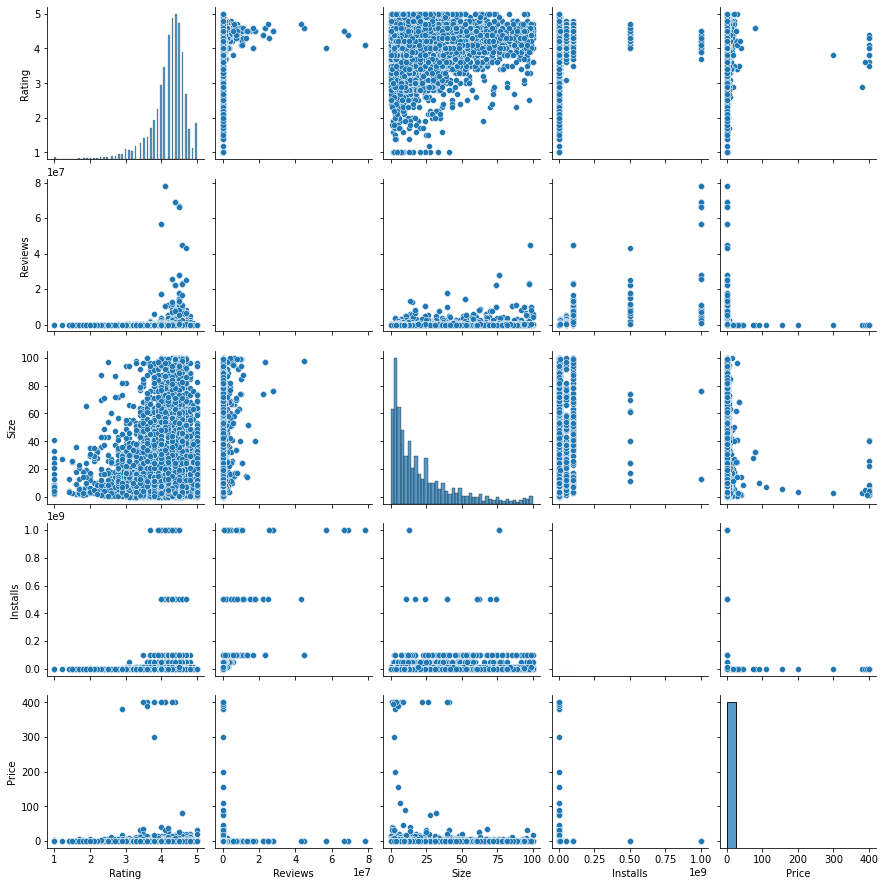

In [90]:
sns.pairplot(df)

<AxesSubplot:>

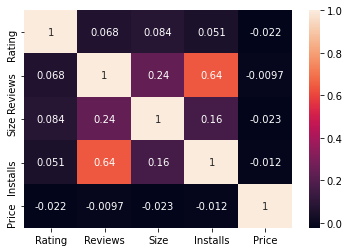

In [91]:
sns.heatmap(df.corr(), annot = True)

#### Вывод: небольшая связь наблюдается между следующими столбцами: рейтинг и размер приложения, рейтинг и количество установок, рейтинг и количество отзывов. Наиболее сильная связь между столбцами количество отзывов и количество установок.

###  Линейная регрессия
<a id=regg></a>
#### Модель прогноза рейтинга приложения на основе его характеристик

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [216]:
df_mean = df.copy(deep=True)
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int32         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int32         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content_Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last_Updated    10840 non-null  datetime64[ns]
 11  Current_Ver     10832 non-null  object        
 12  Android_Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(2), object(7)
memory usage: 1.1+ MB


#### Предсказание рейтинга на основе размера приложения
#### Заменим NaN в столбцах Rating и Size  на среднее значение

In [218]:
#замена NaN на среднее значение
df_mean['Rating'].fillna(df_mean['Rating'].mean(), inplace = True)
df_mean['Size'].fillna(df_mean['Size'].mean(), inplace = True)

In [219]:
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          10840 non-null  float64       
 3   Reviews         10840 non-null  int32         
 4   Size            10840 non-null  float64       
 5   Installs        10840 non-null  int32         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content_Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last_Updated    10840 non-null  datetime64[ns]
 11  Current_Ver     10832 non-null  object        
 12  Android_Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(2), object(7)
memory usage: 1.1+ MB


In [241]:
# разделение на выборки
X = df_mean[['Size']]
y = df_mean[['Rating']]

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [243]:
X_train.shape

(7588, 1)

In [244]:
y_train.shape

(7588, 1)

In [245]:
#обучение модели
model = LinearRegression()
model.fit(X_train, y_train)  

LinearRegression()

In [246]:
model.coef_

array([[0.0017459]])

In [247]:
model.intercept_

array([4.15513835])

In [248]:
#результаты прогноза
y_pred = model.predict(X_test)
y_pred

array([[4.16264574],
       [4.19270415],
       [4.20751547],
       ...,
       [4.16002688],
       [4.16509001],
       [4.19704005]])

In [249]:
#сравнение прогнозов и фактов
res_df = X_test.copy()

res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df

,Size,y_pred,y_test
10758,4.30000,4.162646,4.100000
3069,21.51653,4.192704,4.700000
9656,30.00000,4.207515,4.191757
9061,11.00000,4.174343,5.000000
7933,34.00000,4.214499,3.800000
...,...,...,...
9592,14.00000,4.179581,4.000000
6119,10.00000,4.172597,3.700000
7420,2.80000,4.160027,4.700000
8873,5.70000,4.165090,4.191757


In [250]:
# коэффициент детерминации
model.score(X_test, y_test) 

0.005700340463893894

#### Предсказание рейтинга на основе размера приложения
#### Заменим NaN в столбцах Rating и Size на медиану

In [232]:
df_mediana = df.copy(deep=True)

In [233]:
df_mediana.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int32         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int32         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content_Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last_Updated    10840 non-null  datetime64[ns]
 11  Current_Ver     10832 non-null  object        
 12  Android_Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(2), object(7)
memory usage: 1.1+ MB


In [254]:
#замена NaN на медиану
df_mediana['Rating'].fillna(df_mediana['Rating'].median(), inplace = True)
df_mediana['Size'].fillna(df_mediana['Size'].median(), inplace = True)

In [255]:
X = df_mediana[['Size']]
y = df_mediana[['Rating']]

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [257]:
#обучение модели
model = LinearRegression()
model.fit(X_train, y_train)  

LinearRegression()

In [258]:
#сравнение прогнозов и фактов
res_df = X_test.copy()

res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df

,Size,y_pred,y_test
10758,4.3,4.162646,4.1
3069,13.0,4.192704,4.7
9656,30.0,4.207515,4.3
9061,11.0,4.174343,5.0
7933,34.0,4.214499,3.8
...,...,...,...
9592,14.0,4.179581,4.0
6119,10.0,4.172597,3.7
7420,2.8,4.160027,4.7
8873,5.7,4.165090,4.3


In [259]:
# коэффициент детерминации
model.score(X_test, y_test)

0.0031162331962195644

#### Вывод: коэффициент детерминации при замене NaN на среднее значение (0,0057) больше, чем при замене на медиану (0,0031). Следовательно, 1 модель показывает лучший результат предсказания. Но т.к. оба коэффициента близки к 0, то это означает, что линейная связь между переменными почти отсутсвует. Модель имеет низкую эффективность. 

#### Заменим NaN в столбцах Rating и Size на среднее, построим модель на основе размера приложений и количества отзывов

In [260]:
df_1 = df.copy(deep=True)

In [261]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int32         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int32         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content_Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last_Updated    10840 non-null  datetime64[ns]
 11  Current_Ver     10832 non-null  object        
 12  Android_Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(2), object(7)
memory usage: 1.1+ MB


In [262]:
df_1['Rating'].fillna(df_1['Rating'].mean(), inplace = True)
df_1['Size'].fillna(df_1['Size'].mean(), inplace = True)

In [264]:
X = df_1[['Size','Reviews']]
y = df_1[['Rating']]

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [266]:
#обучение модели
model = LinearRegression()
model.fit(X_train, y_train)  

LinearRegression()

In [267]:
#сравнение прогнозов и фактов
res_df = X_test.copy()

res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df

,Size,Reviews,y_pred,y_test
10758,4.30000,10786,4.162646,4.100000
3069,21.51653,410395,4.192704,4.700000
9656,30.00000,1,4.207515,4.191757
9061,11.00000,6,4.174343,5.000000
7933,34.00000,12667,4.214499,3.800000
...,...,...,...,...
9592,14.00000,21,4.179581,4.000000
6119,10.00000,3,4.172597,3.700000
7420,2.80000,3,4.160027,4.700000
8873,5.70000,6,4.165090,4.191757


In [268]:
#коэффициент детерминации
model.score(X_test, y_test) 

0.008342633366576702

#### Заменим NaN в столбцах Rating и Size на среднее, построим модель на основе всех характеристик приложения

In [281]:
df_2 = df.copy(deep=True)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int32         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int32         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content_Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last_Updated    10840 non-null  datetime64[ns]
 11  Current_Ver     10832 non-null  object        
 12  Android_Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(2), object(7)
memory usage: 1.1+ MB


In [282]:
df_2['Rating'].fillna(df_2['Rating'].mean(), inplace = True)
df_2['Size'].fillna(df_2['Size'].mean(), inplace = True)

In [283]:
X = df_2[['Size','Reviews','Installs','Price']]
y = df_2[['Rating']]

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [285]:
model = LinearRegression()
model.fit(X_train, y_train)  

LinearRegression()

In [286]:
#сравнение прогнозов и фактов
res_df = X_test.copy()

res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df

,Size,Reviews,Installs,Price,y_pred,y_test
10758,4.30000,10786,1000000,0.00,4.162646,4.100000
3069,21.51653,410395,10000000,0.00,4.192704,4.700000
9656,30.00000,1,10,0.00,4.207515,4.191757
9061,11.00000,6,100,0.00,4.174343,5.000000
7933,34.00000,12667,1000000,0.00,4.214499,3.800000
...,...,...,...,...,...,...
9592,14.00000,21,5000,0.99,4.179581,4.000000
6119,10.00000,3,50,0.00,4.172597,3.700000
7420,2.80000,3,500,0.00,4.160027,4.700000
8873,5.70000,6,500,0.00,4.165090,4.191757


In [287]:
#коэффициент детерминации
model.score(X_test, y_test) 

0.009042746090085929

#### Вывод: Модель, построенная на основе всех характеристик, показала наилучший результат предсказания, коэффициент детерминации 0,009 - наибольший из всех. Но в целом модель имеет низкую эффективность.